## <span style="color:brown;"><center> US Superstore Sales Data Analysis </center></span>

In [1]:
# Import required Libraries
import numpy as np # for numeric or some aggregate operations
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for visuals and this is the root of seaborn
import seaborn as sns # for visuals

In [3]:
# Read Superstore Data
superstore=pd.read_excel('Superstore.xls',sheet_name='Orders')

### Step - 1 ----- Understand the Data

In [5]:
superstore # see complete Data or Dataframe

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
superstore.shape # check total rows and columns

(9994, 21)

In [9]:
superstore.columns # to see all columns name

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
superstore.head() # for first 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
superstore.tail() # for last 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2021-119914,2021-05-04,2021-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [15]:
superstore.info() # to see the structure of data or dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [17]:
superstore.dtypes # check data type of all columns

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

In [19]:
superstore.nunique() # check no. of unique values in all columns

Row ID            9994
Order ID          5009
Order Date        1236
Ship Date         1334
Ship Mode            4
Customer ID        793
Customer Name      793
Segment              3
Country/Region       1
City               531
State               49
Postal Code        630
Region               4
Product ID        1862
Category             3
Sub-Category        17
Product Name      1849
Sales             6144
Quantity            14
Discount            12
Profit            7545
dtype: int64

### Step - 2 ------- Cleaning the Data

In [21]:
# 1. first check the null values in data frame, if any-
superstore.isnull().sum()  
# result shows Postal Code column have 11 null values and we also don't need this column so we drop this

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [23]:
# Drop Postal code column 
superstore.drop('Postal Code',axis=1,inplace=True)

In [25]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [27]:
superstore.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [29]:
# 2. drop duplicate values, if any
superstore.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [31]:
superstore.shape

(9994, 20)

In [33]:
# set no. of visible rows 
pd.set_option('display.max_rows',100) # row no.

#### So, this data has been cleaned.

#### and now we could move forward to step 3 (Analysis)

In [35]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Step - 3 ----- Analysis

In [37]:
# 1. First we check Total Sale
superstore['Sales'].sum().round(2)

2297200.86

In [39]:
# 2. Now we check Total Profit
superstore['Profit'].sum().round(2)

286397.02

In [41]:
# 3. We check the Total Quantity Sold
superstore['Quantity'].sum()

37873

In [43]:
# We want to check Total Sale by Category
superstore.groupby(by="Category").Sales.sum().round(2)

Category
Furniture          741999.80
Office Supplies    719047.03
Technology         836154.03
Name: Sales, dtype: float64

In [45]:
# We want to check Total Profit by Category
superstore.groupby(by='Category').Profit.sum().round(2)

Category
Furniture           18451.27
Office Supplies    122490.80
Technology         145454.95
Name: Profit, dtype: float64

In [47]:
# We want to check Total Sale and Total Profit by Category & Sub-Category
superstore.pivot_table(index=['Category','Sub-Category'],values=['Sales','Profit'],aggfunc='sum')

Profit        Sales
Category        Sub-Category                         
Furniture       Bookcases     -3472.5560  114879.9963
                Chairs        26590.1663  328449.1030
                Furnishings   13059.1436   91705.1640
                Tables       -17725.4811  206965.5320
Office Supplies Appliances    18138.0054  107532.1610
                Art            6527.7870   27118.7920
                Binders       30221.7633  203412.7330
                Envelopes      6964.1767   16476.4020
                Fasteners       949.5182    3024.2800
                Labels         5546.2540   12486.3120
                Paper         34053.5693   78479.2060
                Storage       21278.8264  223843.6080
                Supplies      -1189.0995   46673.5380
Technology      Accessories   41936.6357  167380.3180
                Copiers       55617.8249  149528.0300
                Machines       3384.7569  189238.6310
                Phones        44515.7306  330007.0540

In [49]:
# We want to check Total Sale by Region
superstore.groupby(by='Region').Sales.sum().round(2)

Region
Central    501239.89
East       678781.24
South      391721.90
West       725457.82
Name: Sales, dtype: float64

In [51]:
# We want to check Total Profit  by Region
superstore.groupby(by='Region').Profit.sum().round(2)

Region
Central     39706.36
East        91522.78
South       46749.43
West       108418.45
Name: Profit, dtype: float64

In [53]:
# To see the Total Sale and Total Profit by Region
superstore.pivot_table(index='Region',values=['Sales','Profit'],aggfunc='sum').round(2)

,Profit,Sales
Region,,
Central,39706.36,501239.89
East,91522.78,678781.24
South,46749.43,391721.90
West,108418.45,725457.82


In [55]:
# we want to check statistical operations with sale and profit column by region, category, sub-category
superstore.pivot_table(index=['Region','Category','Sub-Category'],values=['Sales','Profit'],aggfunc=['sum','max','min','mean','std'])

sum                     max  \
                                          Profit        Sales     Profit   
Region  Category        Sub-Category                                       
Central Furniture       Bookcases     -1997.9043   24157.1768   407.1288   
                        Chairs         6592.7221   85230.6460   770.3520   
                        Furnishings   -3906.2168   15254.3700   387.5676   
                        Tables        -3559.6504   39154.9710   350.4270   
        Office Supplies Appliances    -2638.6175   23582.0330   793.7160   
                        Art            1195.1591    5765.3400    54.5844   
                        Binders       -1043.6369   56923.2820  4946.3700   
                        Envelopes      1777.5283    4636.8720   204.0714   
                        Fasteners       236.6186     778.0300    21.8880   
                        Labels         1073.0794    2451.4720   240.8595   
                        Paper          6971.9005   17491.9020   301.9680   
                        Storage        1969.8365   45930.1120   226.3626   
                        Supplies       -661.8881    9467.3720    83.2810   
        Technology      Accessories    7251.6306   33956.0760   829.3754   
                        Copiers       15608.8413   37259.5700  8399.9760   
                        Machines      -1486.0666   26797.3840   679.9960   
                        Phones        12323.0267   72403.2820   743.9880   
East    Furniture       Bookcases     -1167.6318   43819.3340  1013.1270   
                        Chairs         9357.7706   96260.6830   609.7157   
                        Furnishings    5881.4071   29071.3800   272.7920   
                        Tables       -11025.3801   39139.8070    20.9670   
        Office Supplies Appliances     8391.4134   34188.4660   735.0336   
                        Art            1899.9443    7485.7640    83.8680   
                        Binders       11267.9346   53497.9970  1453.1238   
                        Envelopes      1812.4090    4375.8740   162.8640   
                        Fasteners       263.9908     819.7180    18.2400   
                        Labels         1129.2800    2602.9340    56.1752   
                        Paper          9015.3710   20172.6020   219.4416   
                        Storage        8389.3712   71612.5840   792.2691   
                        Supplies      -1155.1352   10760.1160    36.8130   
        Technology      Accessories   11195.8644   45033.3720   762.1845   
                        Copiers       17022.8418   53219.4620  5039.9856   
                        Machines       6928.6429   66106.1650  2400.9657   
                        Phones        12314.6860  100614.9820  1228.1787   
South   Furniture       Bookcases      1339.4918   10899.3620   374.6286   
                        Chairs         6612.0893   45176.4460   746.4078   
                        Furnishings    3442.6829   17306.6840   297.6900   
                        Tables        -4623.0579   43916.1920   493.7856   
        Office Supplies Appliances     4123.9396   19525.3260   694.5015   
                        Art            1058.5866    4655.6220    79.7580   
                        Binders        3900.6640   37030.3410  3177.4750   
                        Envelopes      1465.4770    3345.5560   146.2405   
                        Fasteners       173.7181     503.3160    21.6000   
                        Labels         1040.7723    2353.1800   240.8595   
                        Paper          5947.0614   14150.9840   301.9680   
                        Storage        2274.2965   35768.0600   375.4296   
                        Supplies          1.8773    8318.9280    83.2810   
        Technology      Accessories    7004.5424   27276.7540   653.3010   
                        Copiers        3658.9067    9299.7560  1439.9760   
                        Machines      -1438.8930   53890.9600  2799.9840   
                 

In [57]:
# We want to see the correlation between Profit and Sale
superstore[['Sales','Profit']].corr() # Result shows the Positive Correlation

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


In [59]:
# We want to see, what is the Total Sole by Year and for that we need to extract Year form "Order Date" column
superstore['year']=superstore['Order Date'].dt.year

In [61]:
superstore.groupby(by='year').Sales.sum().round(2)
# the result shows sale is incresing per year

year
2018    484247.50
2019    470532.51
2020    609205.60
2021    733215.26
Name: Sales, dtype: float64

In [63]:
# We want to see, what is the Total Profit by Year
superstore.groupby(by='year').Profit.sum().round(2) # the result shows profit is also increasing per year

year
2018    49543.97
2019    61618.60
2020    81795.17
2021    93439.27
Name: Profit, dtype: float64

In [65]:
# Statistical operations in all numeric columns
superstore.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,year
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2020-04-30 00:07:03.614168576,2020-05-03 23:06:58.571142656,229.858001,3.789574,0.156203,28.656896,2019.722233
min,1.000000,2018-01-03 00:00:00,2018-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,2018.000000
25%,2499.250000,2019-05-23 00:00:00,2019-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750,2019.000000
50%,4997.500000,2020-06-26 00:00:00,2020-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500,2020.000000
75%,7495.750000,2021-05-14 00:00:00,2021-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000,2021.000000
max,9994.000000,2021-12-30 00:00:00,2022-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,2021.000000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108,1.123555


In [67]:
# We want to see, what is the Total Sale by States
superstore.groupby(by='State').Sales.sum().round(2)

State
Alabama                  19510.64
Arizona                  35282.00
Arkansas                 11678.13
California              457687.63
Colorado                 32108.12
Connecticut              13384.36
Delaware                 27451.07
District of Columbia      2865.02
Florida                  89473.71
Georgia                  49095.84
Idaho                     4382.49
Illinois                 80166.10
Indiana                  53555.36
Iowa                      4579.76
Kansas                    2914.31
Kentucky                 36591.75
Louisiana                 9217.03
Maine                     1270.53
Maryland                 23705.52
Massachusetts            28634.43
Michigan                 76269.61
Minnesota                29863.15
Mississippi              10771.34
Missouri                 22205.15
Montana                   5589.35
Nebraska                  7464.93
Nevada                   16729.10
New Hampshire             7292.52
New Jersey               35764.31
New Mexi

#### So, now we create some Visuals to find meaningful information easily

<Axes: xlabel='year', ylabel='Sales'>

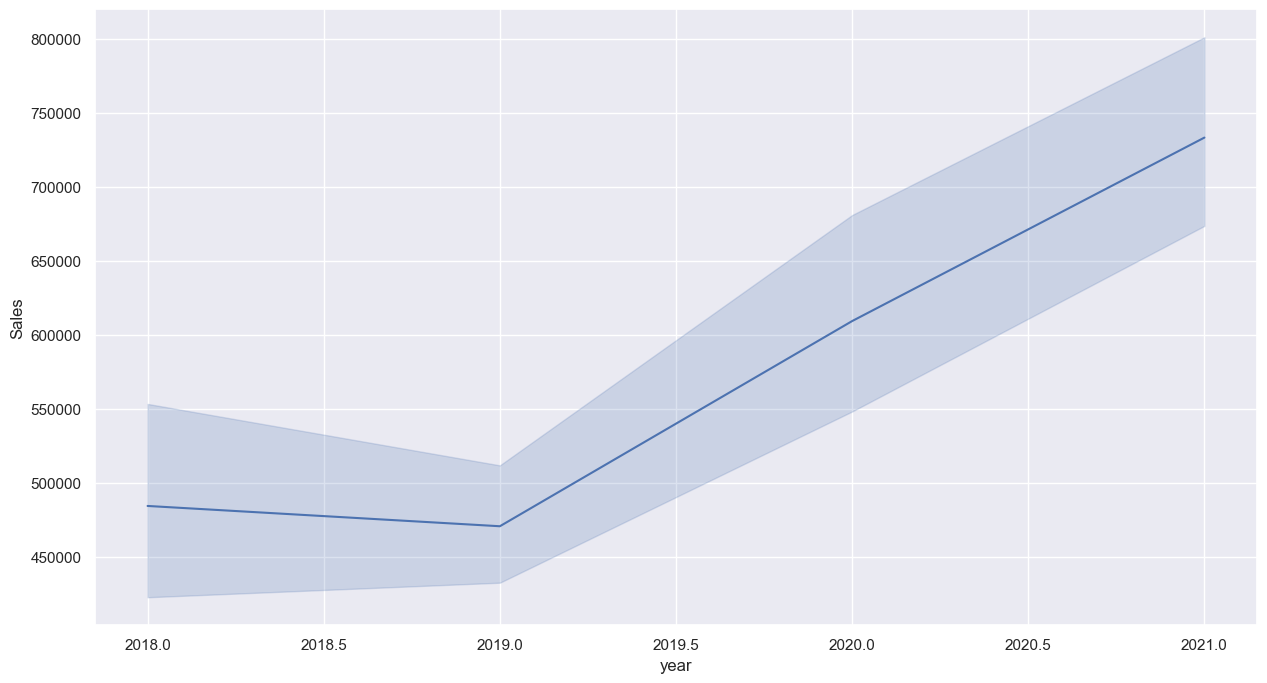

In [69]:
# 1. First we want to see, the sales trend by year using Line Chart
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data=superstore,x='year',y='Sales',estimator=sum)

<Axes: xlabel='year', ylabel='Profit'>

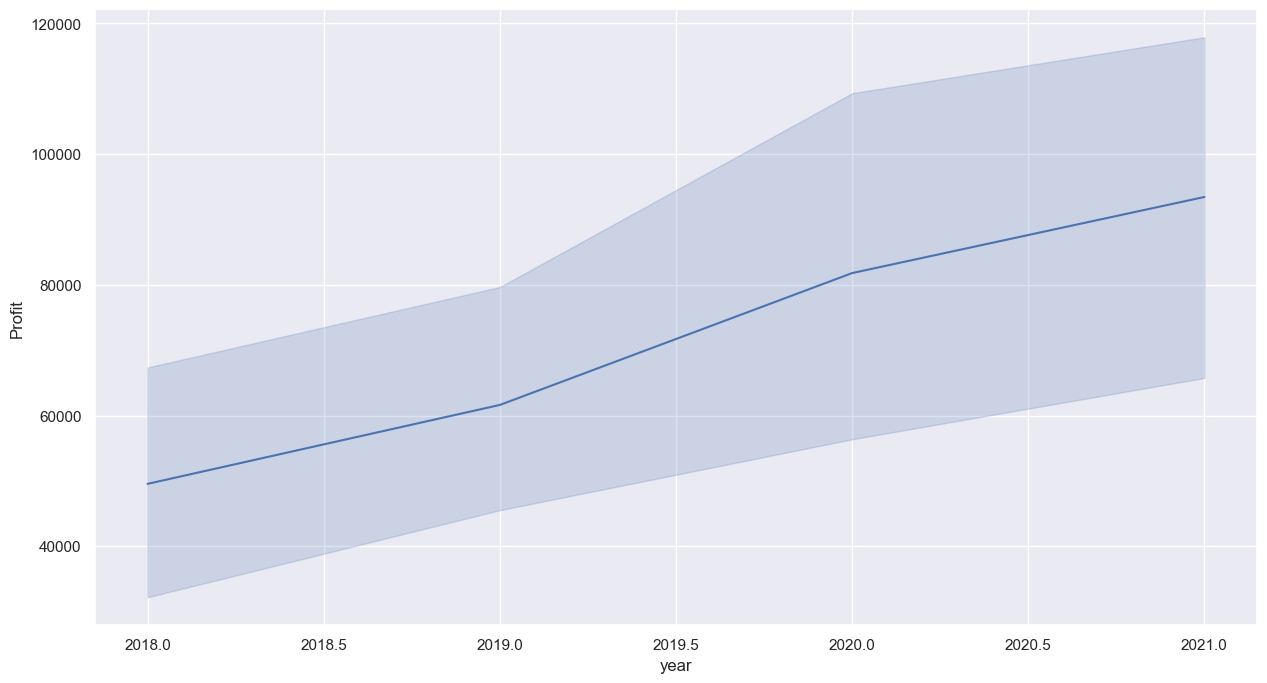

In [71]:
# We want to see, the Profit trend by year using line plot
sns.lineplot(data=superstore,x='year',y='Profit',estimator=sum)

<Axes: xlabel='Sales', ylabel='Profit'>

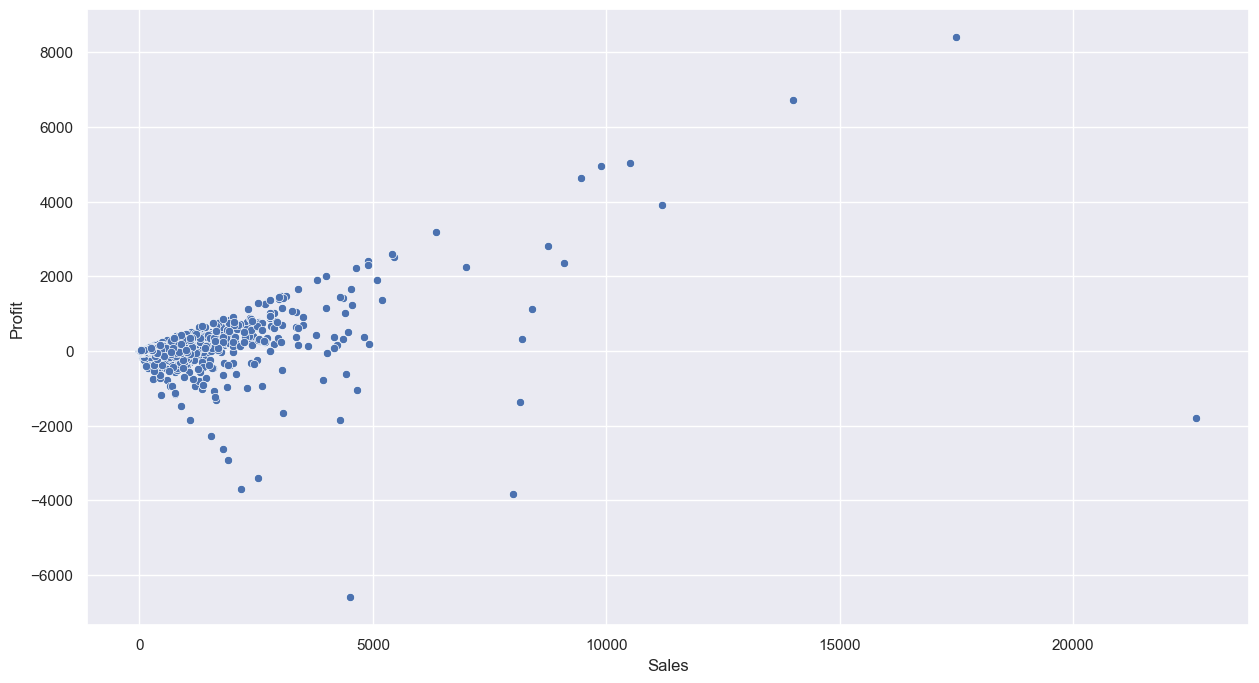

In [73]:
# We want to know the relationship between Total Sale and Total Profit using Scatter plot
sns.scatterplot(x=superstore.Sales,y=superstore.Profit)

<Axes: xlabel='Sales', ylabel='Profit'>

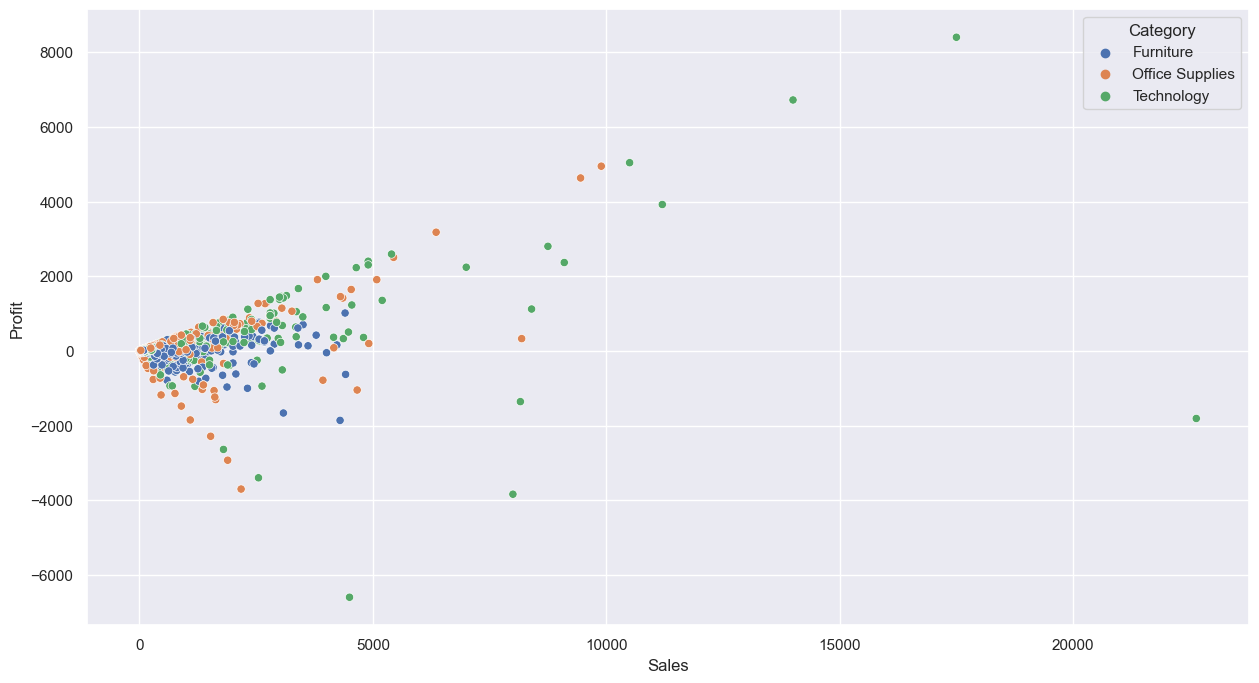

In [75]:
# We want to know the relationship between Total Sale and Total Profit according to Category using Scatter plot
sns.scatterplot(x=superstore.Sales,y=superstore.Profit,hue=superstore.Category)

<Axes: xlabel='Sales', ylabel='Profit'>

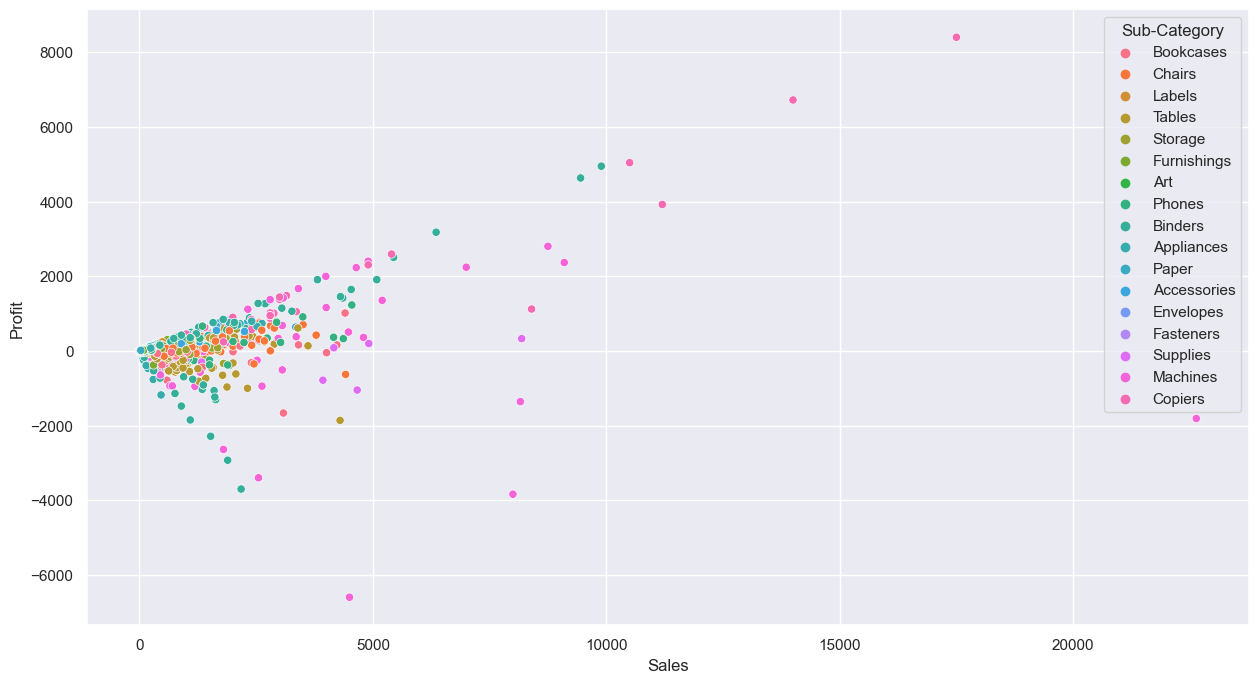

In [77]:
# We want to know the relationship between Total Sale and Total Profit according to sub-Category using Scatter plot
subc=superstore['Sub-Category']
sns.scatterplot(x=superstore.Sales,y=superstore.Profit,hue=subc)

In [79]:
# Check and find the details where Sale is less than 5000 and loss is huge
superstore[(superstore.Sales<5000) & (superstore.Profit<-6000)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
7772,7773,CA-2020-108196,2020-11-25,2020-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978,2020


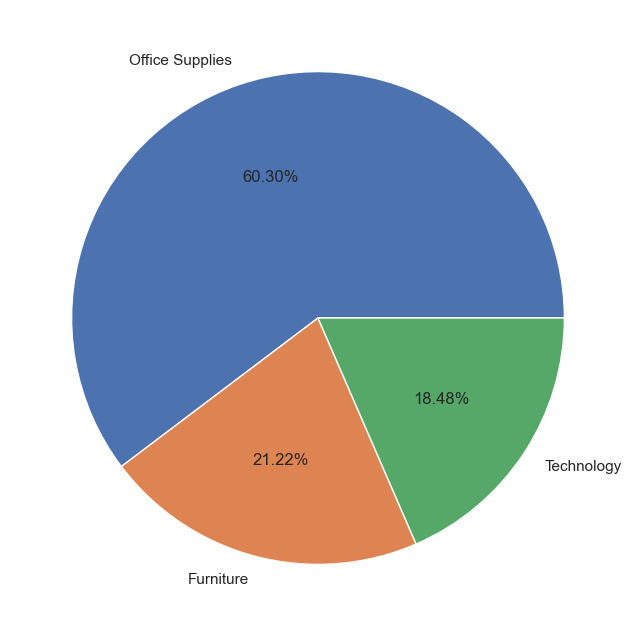

In [81]:
# We want to know the order wise ratio of Category
plt.pie(superstore.Category.value_counts().values,labels=superstore.Category.value_counts().index,autopct='%.2f%%')
plt.show()

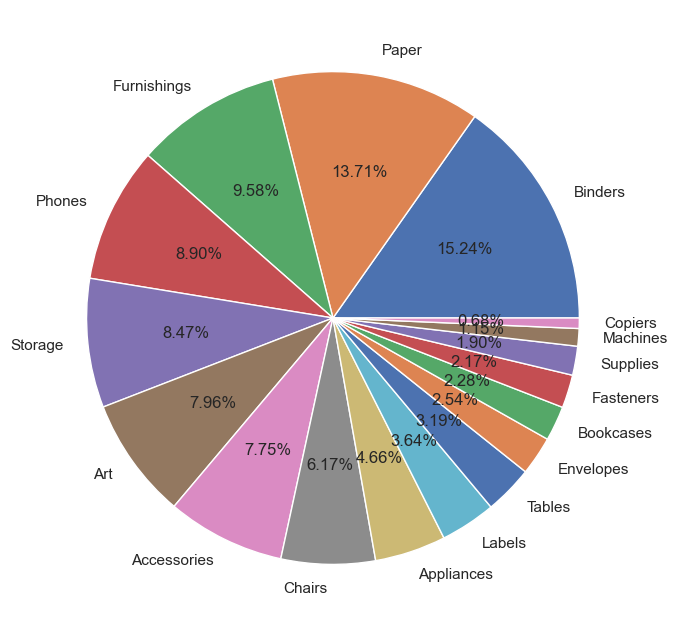

In [83]:
# We want to know the order wise ratio of Sub-Category
subx=superstore['Sub-Category'].value_counts().values
subls=superstore['Sub-Category'].value_counts().index
plt.pie(subx,labels=subls,autopct='%.2f%%')
plt.show()

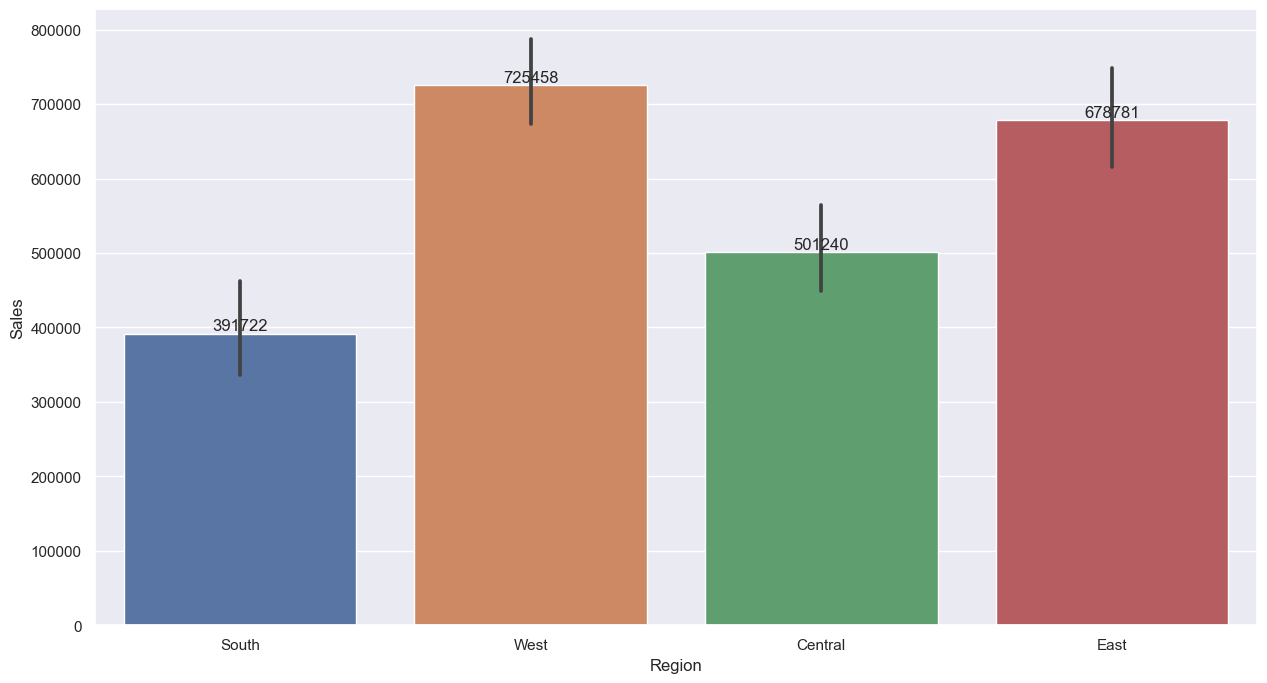

In [85]:
# We want to know, Region wise Total Sale
sns.set(rc={'figure.figsize':(15,8)})
a=sns.barplot(x=superstore.Region,y=superstore.Sales,estimator=sum)
for i in a.containers:
    a.bar_label(i,)

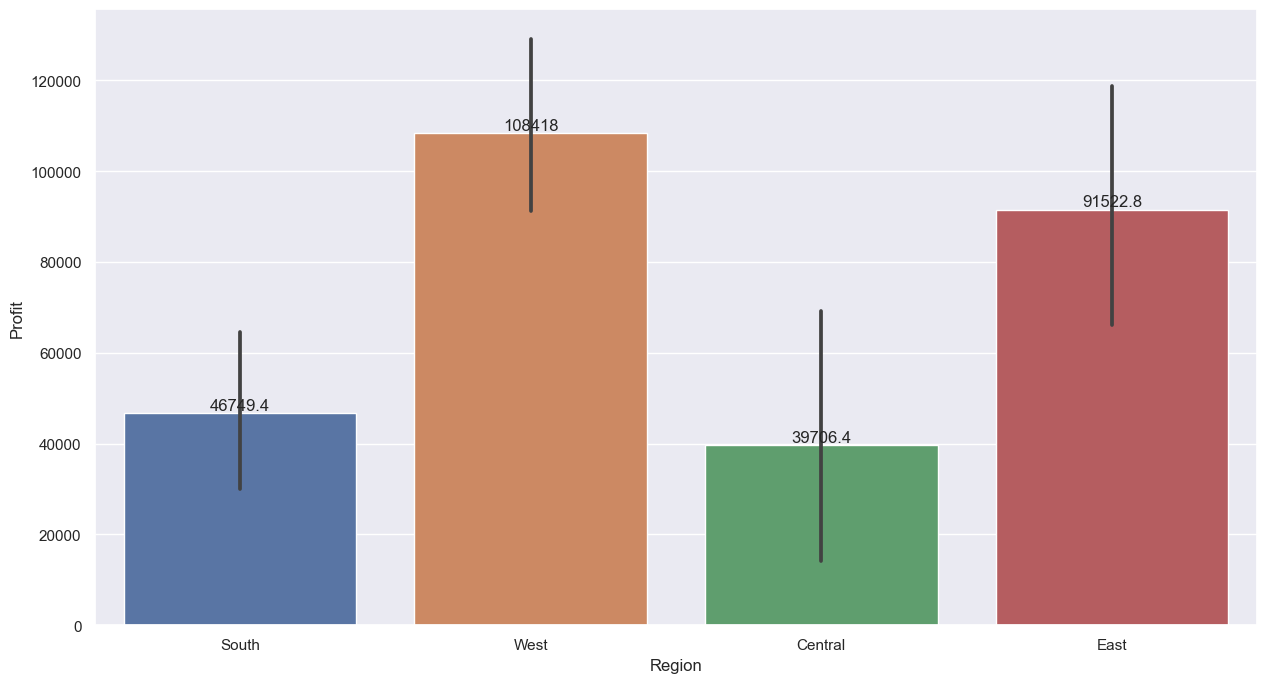

In [87]:
# We want to know, Profit by Region
a=sns.barplot(x=superstore.Region,y=superstore.Profit,estimator=sum)
for i in a.containers:
    a.bar_label(i,)

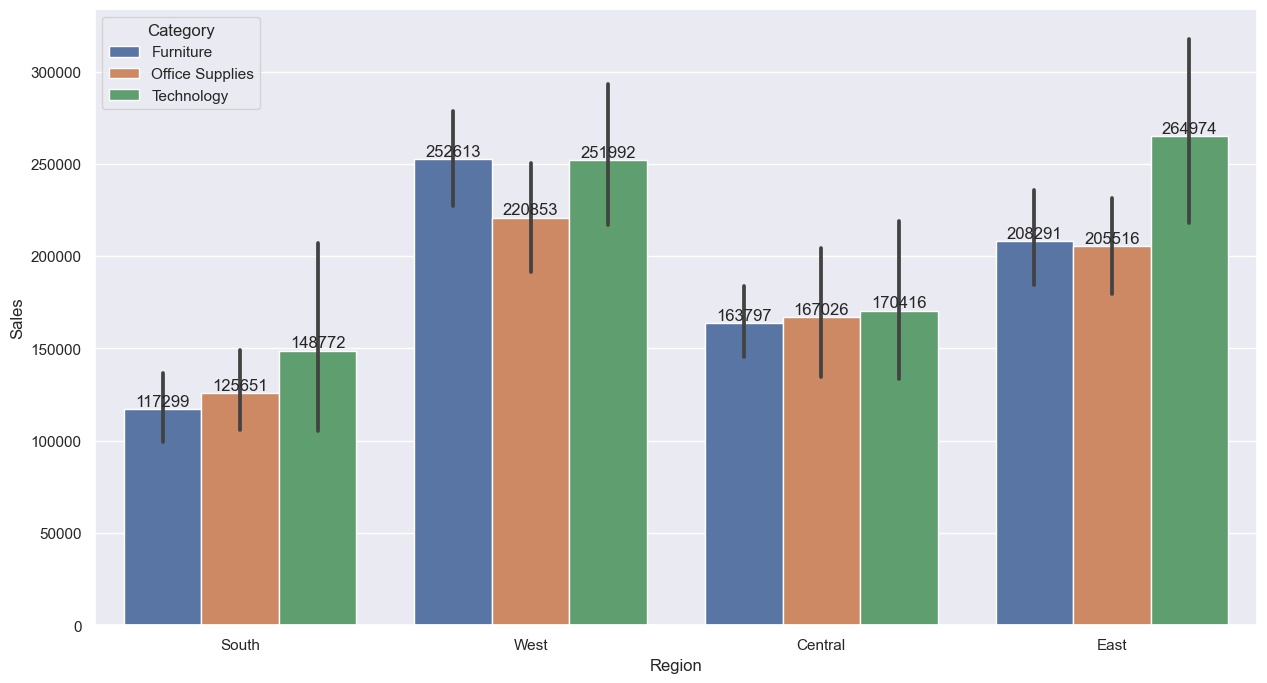

In [89]:
# We want to know, Total sale by Category acc. to Region
a=sns.barplot(x=superstore.Region,y=superstore.Sales,estimator=sum,hue=superstore.Category)
for i in a.containers:
    a.bar_label(i,)

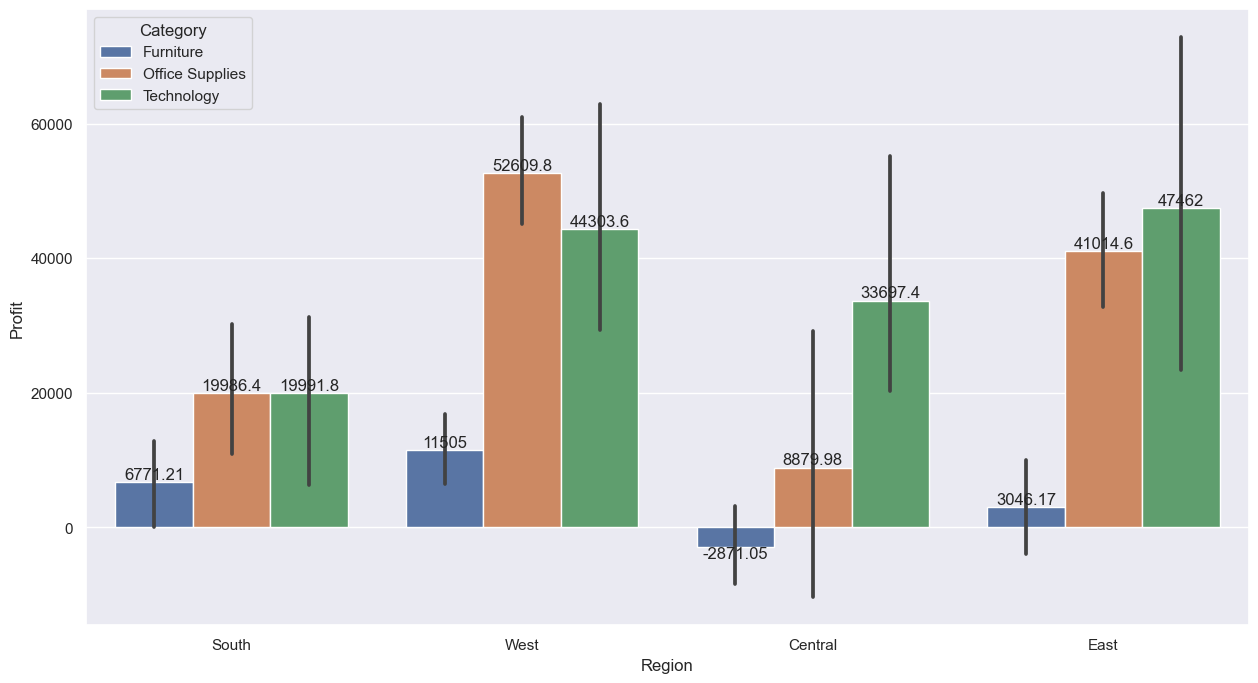

In [91]:
# We want to know, the Total Profit by Category acc. to Region
a=sns.barplot(x=superstore.Region,y=superstore.Profit,estimator=sum,hue=superstore.Category)
for i in a.containers:
    a.bar_label(i,)

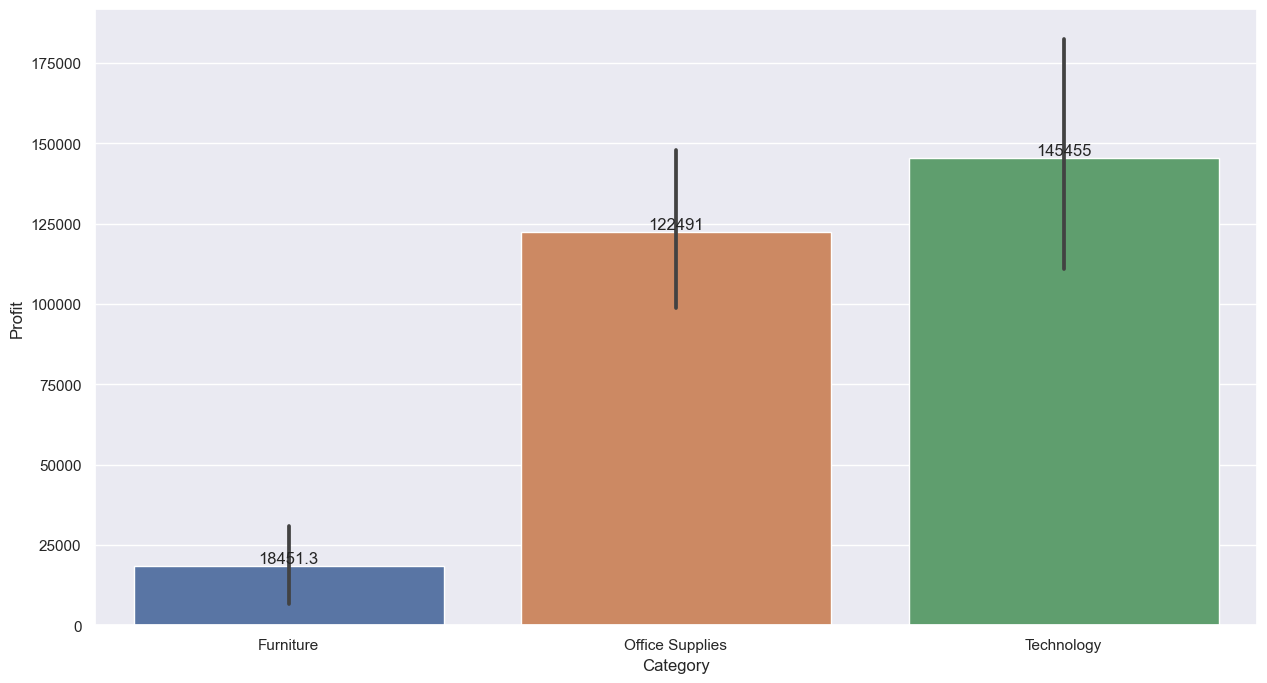

In [93]:
# We want to know the category wise total profit
a=sns.barplot(x=superstore.Category,y=superstore.Profit,estimator=sum)
for i in a.containers:
    a.bar_label(i,)

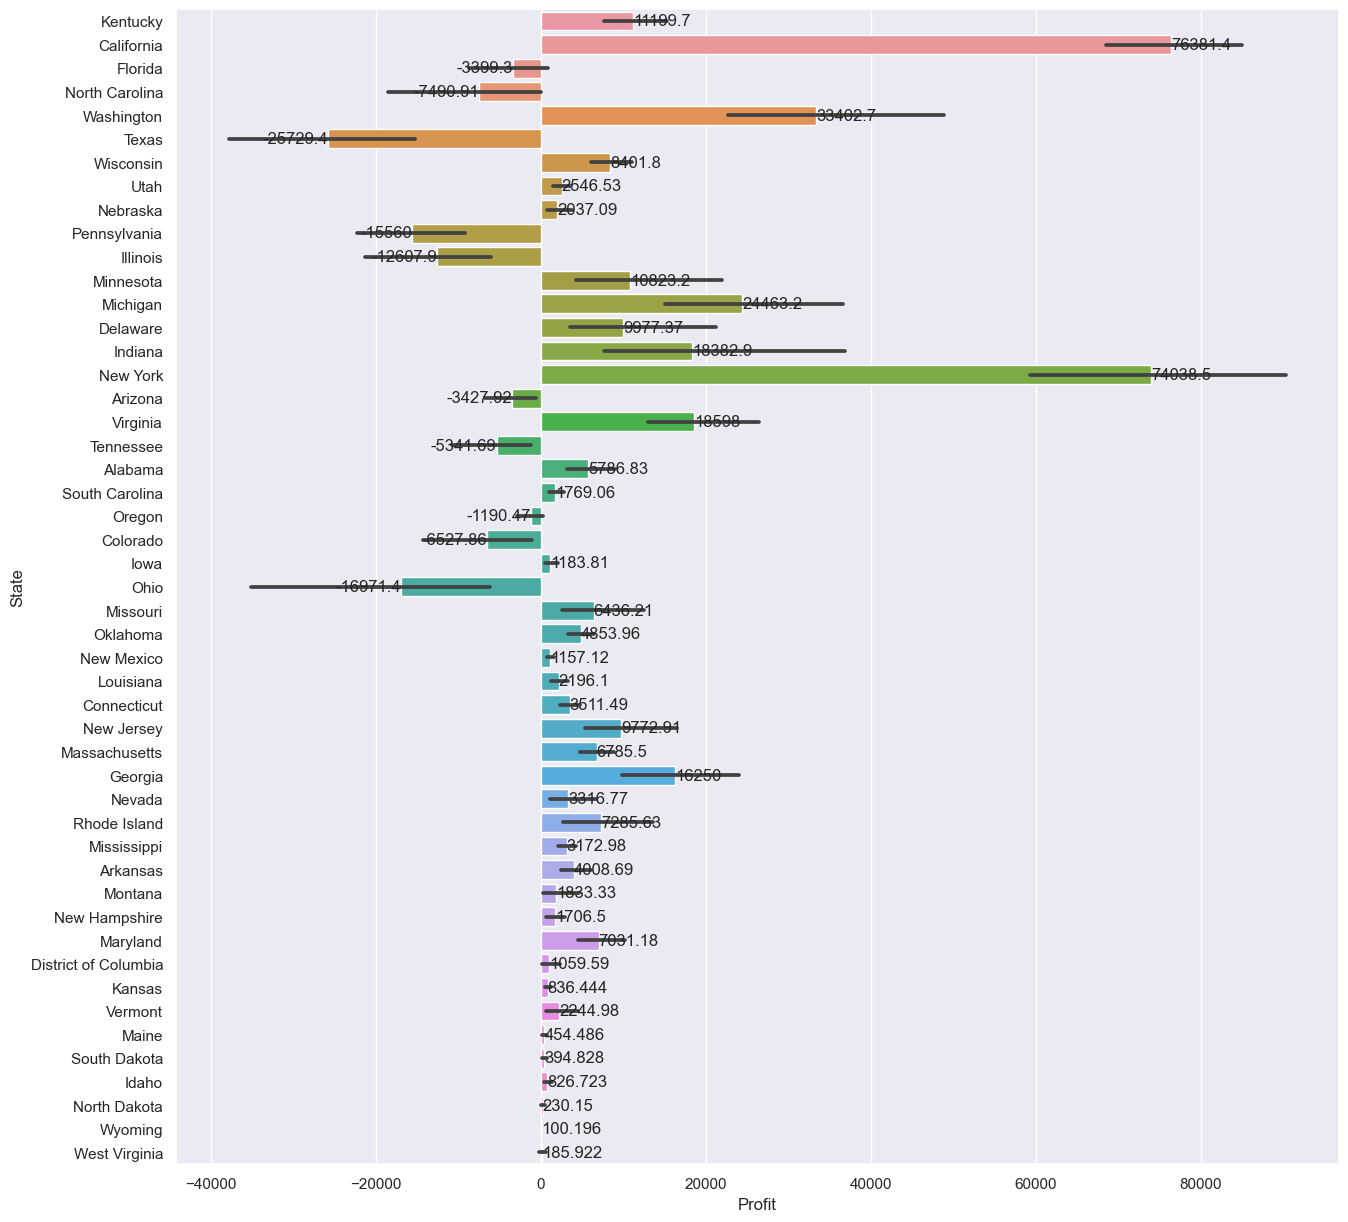

In [95]:
# We want to know the state wise total profit
sns.set(rc={'figure.figsize':(15,15)})
a=sns.barplot(x=superstore.Profit,y=superstore.State,estimator=sum)
for i in a.containers:
    a.bar_label(i,)

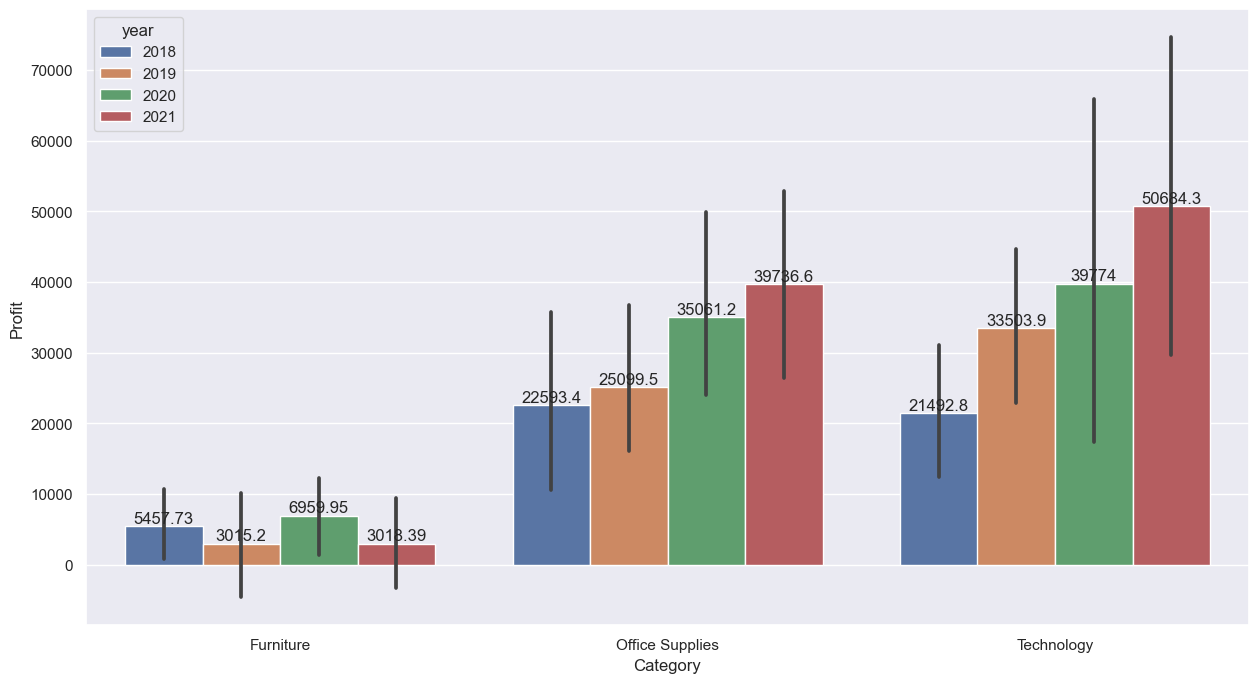

In [97]:
# We want to know the category wise total profit in all years
sns.set(rc={'figure.figsize':(15,8)})
a=sns.barplot(x=superstore.Category,y=superstore.Profit,estimator=sum,hue=superstore.year)
for i in a.containers:
    a.bar_label(i,)

#### So, the conclusion of Analysis is - 
- The analysis shows that the Superstore's Sales and Profits have increased annually, indicating a healthy financial situation.
- The most Profitable category is Technology, while Furniture has the lowest Profitability.
- The State with the highest profit is California, while Texas has the most Losses.
- The Region with the highest profit is West, while Central has the lowest profit.
- The Superstore received the most orders for Office Supplies and Binders, but earned the most profit from Technology and Copiers.